# Analyse of chess games 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "C:\\Users\\ASUS\\Downloads\\games.csv"
df = pd.read_csv(path)

In [3]:
df.head(5)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13.0,outoftime,white,15+2,bourgris,1500.0,a-00,1191.0,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5.0
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16.0,resign,black,5+10,a-00,1322.0,skinnerua,1261.0,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4.0
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61.0,mate,white,5+10,ischia,1496.0,a-00,1500.0,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3.0
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61.0,mate,white,20+0,daniamurashov,1439.0,adivanov2009,1454.0,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3.0
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95.0,mate,white,30+3,nik221107,1523.0,adivanov2009,1469.0,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2805 non-null   object 
 1   rated           2805 non-null   bool   
 2   created_at      2805 non-null   float64
 3   last_move_at    2805 non-null   float64
 4   turns           2804 non-null   float64
 5   victory_status  2804 non-null   object 
 6   winner          2804 non-null   object 
 7   increment_code  2804 non-null   object 
 8   white_id        2804 non-null   object 
 9   white_rating    2804 non-null   float64
 10  black_id        2804 non-null   object 
 11  black_rating    2804 non-null   float64
 12  moves           2804 non-null   object 
 13  opening_eco     2804 non-null   object 
 14  opening_name    2804 non-null   object 
 15  opening_ply     2804 non-null   float64
dtypes: bool(1), float64(6), object(9)
memory usage: 331.6+ KB


## We found some missing values that we can't calculate or even found them in other places so I am obliged to delete them.  

In [5]:
df.dropna(axis = 0 , inplace = True)

## After cleaning the dataset, a quastion come to mind; what are the results of the most 5 opening used in this dataset.


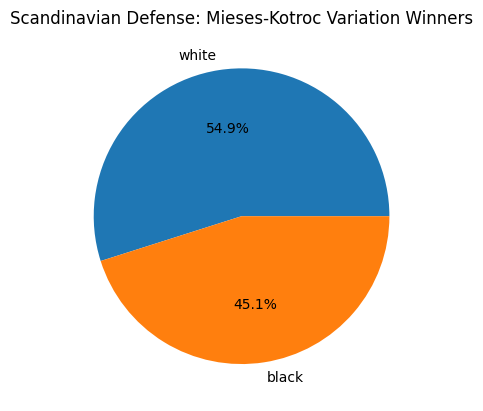

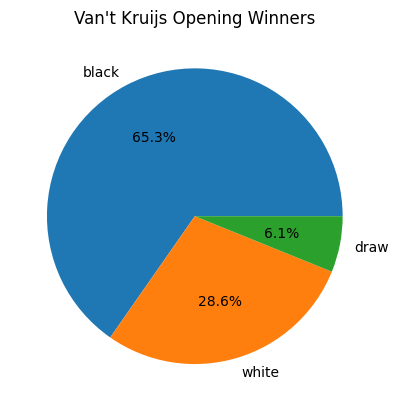

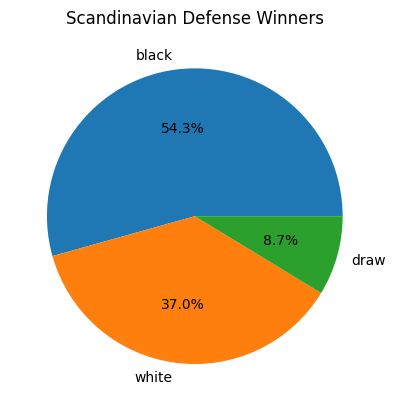

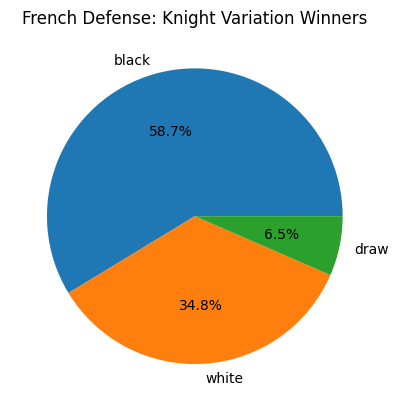

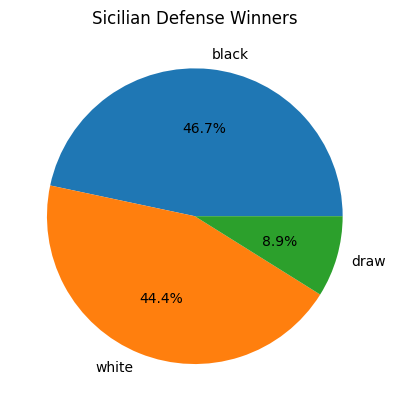

In [6]:
df2 = df[["opening_name","winner"]]
most_used = df2["opening_name"].value_counts().head(5).index
df_filtered = df[df["opening_name"].isin(most_used)]

for opening in most_used:
    opening_df = df_filtered[df_filtered["opening_name"] == opening]
    winner_counts = opening_df["winner"].value_counts()
    
    plt.figure( )
    plt.pie(winner_counts, labels=winner_counts.index, autopct="%1.1f%%")
    plt.title(f"{opening} Winners")
plt.show()

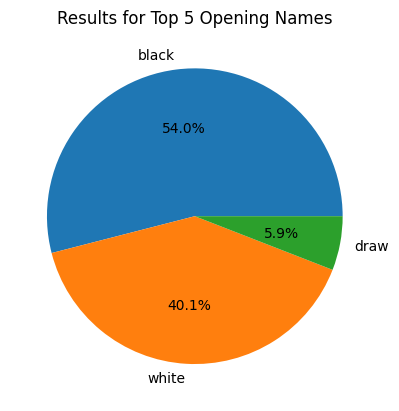

In [7]:
df_filtered = df[df["opening_name"].isin(most_used)]
winner_counts = df_filtered["winner"].value_counts()
plt.pie(winner_counts, labels=winner_counts.index, autopct="%1.1f%%")
plt.title("Results for Top 5 Opening Names")
plt.show()

## We found that from the 5 most used opening that the black players wins 54% of the games also they dominate at 65.3% in the "Van't Kruijs Opening".

# -------------------------------------------------------------------------------------------

## To go deeper from the latest graph i devided the players with their rating to see how what it's more convignent from the to choose their opening.

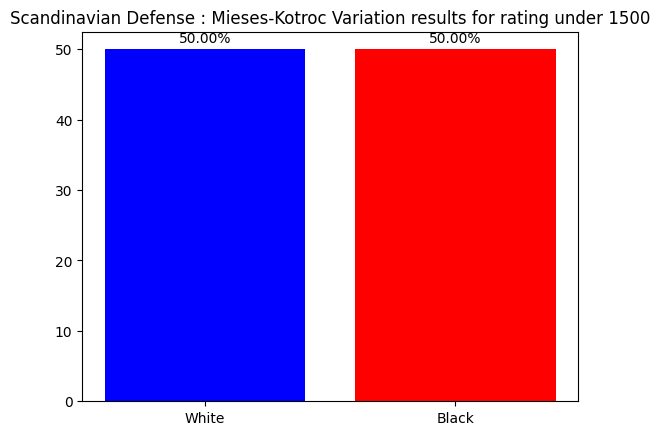

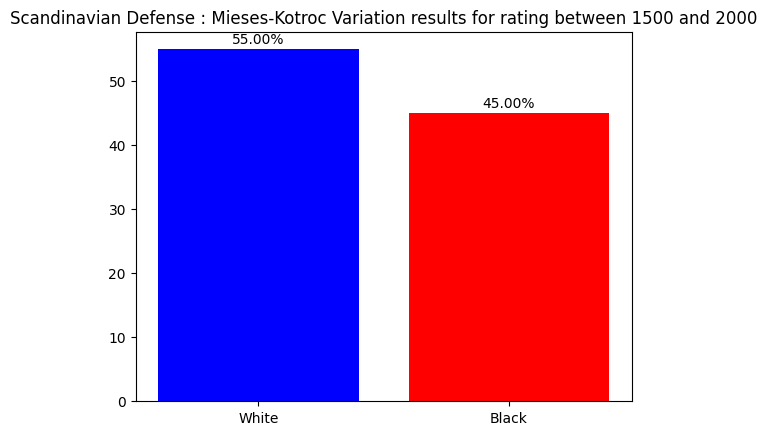

     white_rating winner
680        2091.0  white
49         2436.0  white


In [8]:
class_scandinavian = df[ df["opening_name"] == "Scandinavian Defense: Mieses-Kotroc Variation" ][["white_rating" , "winner"]].sort_values("white_rating")
class_scandinavian = class_scandinavian[ class_scandinavian["white_rating"] >= 1000] 
class_scandinavian_rating1 = class_scandinavian[ class_scandinavian[ "white_rating"] <=1500]

win_counts = class_scandinavian_rating1['winner'].value_counts()
white_win_percentage = (win_counts['white'] / len(class_scandinavian_rating1)) * 100
black_win_percentage = (win_counts['black'] / len(class_scandinavian_rating1)) * 100

labels = ['White', 'Black']
percentages = [white_win_percentage, black_win_percentage]

plt.bar(labels, percentages, color=['blue', 'red'])
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f"{percentage:.2f}%", ha='center')
plt.title('Scandinavian Defense : Mieses-Kotroc Variation results for rating under 1500')
plt.show()

class_scandinavian_rating2 = class_scandinavian[ (class_scandinavian[ "white_rating"] > 1500)  &  (class_scandinavian[ "white_rating"]< 2000)]
win_counts = class_scandinavian_rating2['winner'].value_counts()
white_win_percentage = (win_counts['white'] / len(class_scandinavian_rating2)) * 100
black_win_percentage = (win_counts['black'] / len(class_scandinavian_rating2)) * 100

labels = ['White', 'Black']
percentages = [white_win_percentage, black_win_percentage]
plt.bar(labels, percentages, color=['blue', 'red'])
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f"{percentage:.2f}%", ha='center')
plt.title('Scandinavian Defense : Mieses-Kotroc Variation results for rating between 1500 and 2000')
plt.show()


class_scandinavian_rating3 = class_scandinavian[ class_scandinavian[ "white_rating"] >2000]
print(class_scandinavian_rating3)

### For players over 2000 on the rating scale we have only 2 games with the win of the 'White' for both of them.

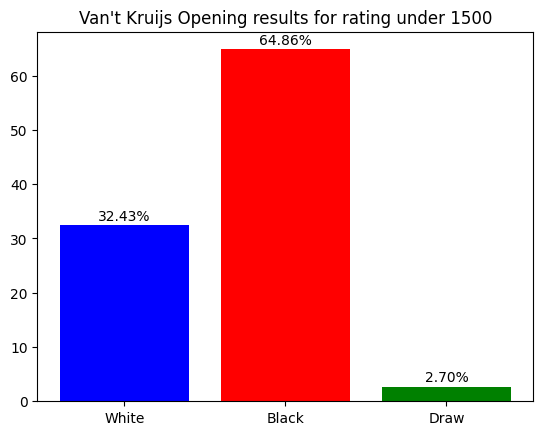

In [9]:
class_Vant_Kruijs_Opening = df[ df["opening_name"] == "Van't Kruijs Opening" ][["white_rating" , "winner"]].sort_values("white_rating")

class_Vant_Kruijs_Opening_rating1 = class_Vant_Kruijs_Opening[class_Vant_Kruijs_Opening[ "white_rating"] < 1500]
win_counts = class_Vant_Kruijs_Opening_rating1['winner'].value_counts()
white_win_percentage = (win_counts['white'] / len(class_Vant_Kruijs_Opening_rating1)) * 100
black_win_percentage = (win_counts['black'] / len(class_Vant_Kruijs_Opening_rating1)) * 100
draw_percentage = (win_counts['draw'] / len(class_Vant_Kruijs_Opening_rating1)) * 100
labels = ['White', 'Black', 'Draw']
percentages = [white_win_percentage, black_win_percentage , draw_percentage ]
plt.bar(labels, percentages, color=['blue', 'red', 'green'])
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f"{percentage:.2f}%", ha='center')
plt.title("Van't Kruijs Opening results for rating under 1500")
plt.show()

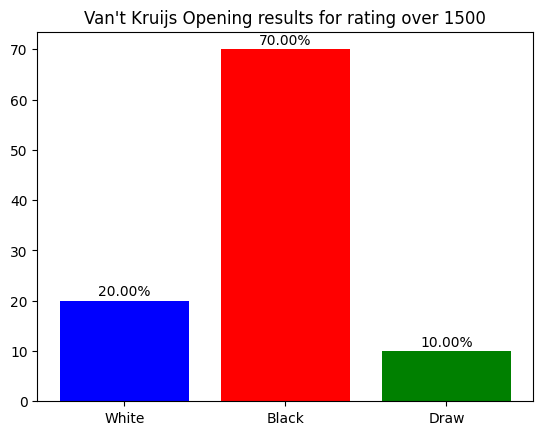

Empty DataFrame
Columns: [white_rating, winner]
Index: []


In [10]:
class_Vant_Kruijs_Opening_rating2 = class_Vant_Kruijs_Opening[class_Vant_Kruijs_Opening[ "white_rating"] > 1500]
win_counts = class_Vant_Kruijs_Opening_rating2['winner'].value_counts()
white_win_percentage = (win_counts['white'] / len(class_Vant_Kruijs_Opening_rating2)) * 100
black_win_percentage = (win_counts['black'] / len(class_Vant_Kruijs_Opening_rating2)) * 100
draw_percentage = (win_counts['draw'] / len(class_Vant_Kruijs_Opening_rating2)) * 100
labels = ['White', 'Black', 'Draw']
percentages = [white_win_percentage, black_win_percentage , draw_percentage ]
plt.bar(labels, percentages, color=['blue', 'red', 'green'])
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f"{percentage:.2f}%", ha='center')
plt.title("Van't Kruijs Opening results for rating over 1500")
plt.show()

class_Vant_Kruijs_Opening_rating3 = class_Vant_Kruijs_Opening[class_Vant_Kruijs_Opening[ "white_rating"] > 2000]
print(class_Vant_Kruijs_Opening_rating3)

### There is no data for players with rating over 2000.

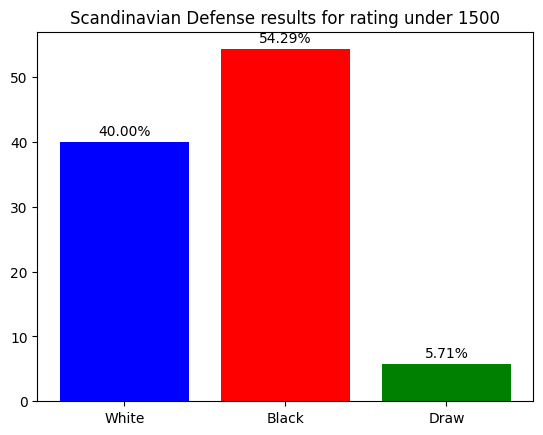

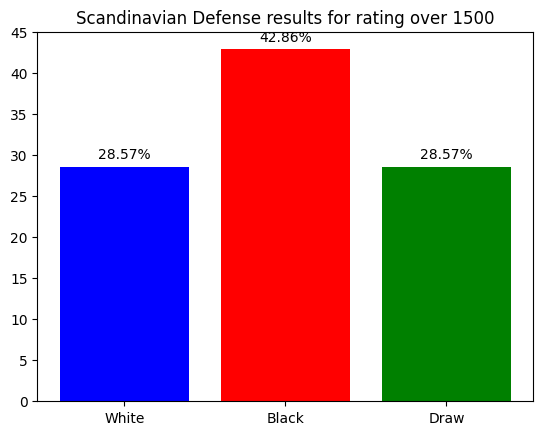

Empty DataFrame
Columns: [white_rating, winner]
Index: []


In [11]:
class_scandinavian_defense = df[ df["opening_name"] == "Scandinavian Defense" ][["white_rating" , "winner"]].sort_values("white_rating")

class_scandinavian_defense_rating1 = class_scandinavian_defense[class_scandinavian_defense[ "white_rating"] < 1500]
win_counts = class_scandinavian_defense_rating1['winner'].value_counts()
white_win_percentage = (win_counts['white'] / len(class_scandinavian_defense_rating1)) * 100
black_win_percentage = (win_counts['black'] / len(class_scandinavian_defense_rating1)) * 100
draw_percentage = (win_counts['draw'] / len(class_scandinavian_defense_rating1)) * 100
labels = ['White', 'Black', 'Draw']
percentages = [white_win_percentage, black_win_percentage , draw_percentage ]
plt.bar(labels, percentages, color=['blue', 'red', 'green'])
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f"{percentage:.2f}%", ha='center')
plt.title("Scandinavian Defense results for rating under 1500")
plt.show()

class_scandinavian_defense_rating2 = class_scandinavian_defense[class_scandinavian_defense[ "white_rating"] > 1500]
win_counts = class_scandinavian_defense_rating2['winner'].value_counts()
white_win_percentage = (win_counts['white'] / len(class_scandinavian_defense_rating2)) * 100
black_win_percentage = (win_counts['black'] / len(class_scandinavian_defense_rating2)) * 100
draw_percentage = (win_counts['draw'] / len(class_scandinavian_defense_rating2)) * 100
labels = ['White', 'Black', 'Draw']
percentages = [white_win_percentage, black_win_percentage , draw_percentage ]
plt.bar(labels, percentages, color=['blue', 'red', 'green'])
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f"{percentage:.2f}%", ha='center')
plt.title("Scandinavian Defense results for rating over 1500")
plt.show()

class_scandinavian_defense_rating3 = class_scandinavian_defense[class_scandinavian_defense[ "white_rating"] > 2000]
print(class_scandinavian_defense_rating3)

### There is no data for players with rating over 2000.

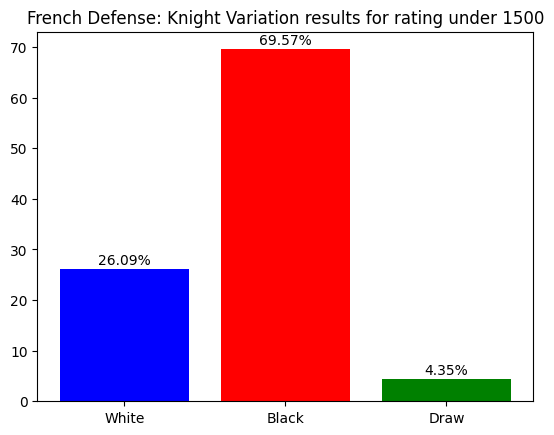

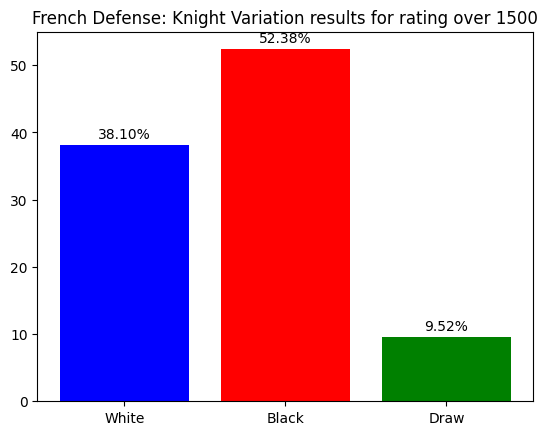

Empty DataFrame
Columns: [white_rating, winner]
Index: []


In [12]:
class_French_Defense_Knight_Variation = df[ df["opening_name"] == "French Defense: Knight Variation" ][["white_rating" , "winner"]].sort_values("white_rating")

class_French_Defense_Knight_Variation_rating1 = class_French_Defense_Knight_Variation[class_French_Defense_Knight_Variation[ "white_rating"] < 1500]
win_counts = class_French_Defense_Knight_Variation_rating1['winner'].value_counts()
white_win_percentage = (win_counts['white'] / len(class_French_Defense_Knight_Variation_rating1)) * 100
black_win_percentage = (win_counts['black'] / len(class_French_Defense_Knight_Variation_rating1)) * 100
draw_percentage = (win_counts['draw'] / len(class_French_Defense_Knight_Variation_rating1)) * 100
labels = ['White', 'Black', 'Draw']
percentages = [white_win_percentage, black_win_percentage , draw_percentage ]
plt.bar(labels, percentages, color=['blue', 'red', 'green'])
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f"{percentage:.2f}%", ha='center')
plt.title("French Defense: Knight Variation results for rating under 1500")
plt.show()

class_French_Defense_Knight_Variation_rating2 = class_French_Defense_Knight_Variation[class_French_Defense_Knight_Variation[ "white_rating"] >1500]
win_counts = class_French_Defense_Knight_Variation_rating2['winner'].value_counts()
white_win_percentage = (win_counts['white'] / len(class_French_Defense_Knight_Variation_rating2)) * 100
black_win_percentage = (win_counts['black'] / len(class_French_Defense_Knight_Variation_rating2)) * 100
draw_percentage = (win_counts['draw'] / len(class_French_Defense_Knight_Variation_rating2)) * 100
labels = ['White', 'Black', 'Draw']
percentages = [white_win_percentage, black_win_percentage , draw_percentage ]
plt.bar(labels, percentages, color=['blue', 'red', 'green'])
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f"{percentage:.2f}%", ha='center')
plt.title("French Defense: Knight Variation results for rating over 1500")
plt.show()

class_French_Defense_Knight_Variation_rating3 = class_French_Defense_Knight_Variation[class_French_Defense_Knight_Variation[ "white_rating"] >2000]
print(class_French_Defense_Knight_Variation_rating3)

### There is no data for players with rating over 2000.

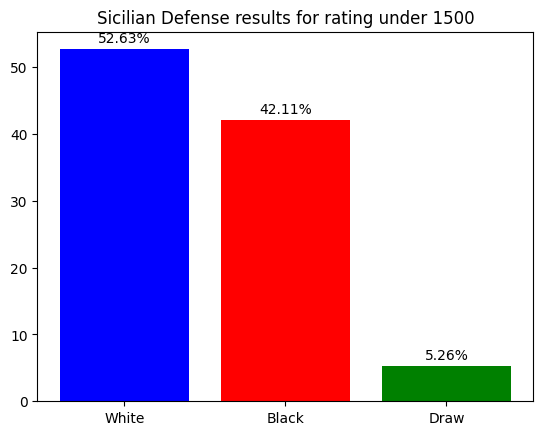

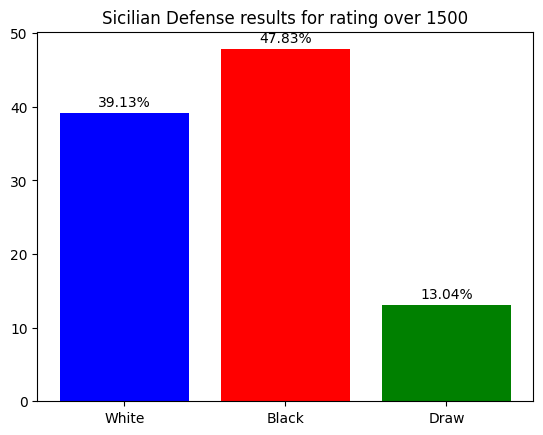

Empty DataFrame
Columns: [white_rating, winner]
Index: []


In [13]:
class_Sicilian_Defense = df[ df["opening_name"] == "Sicilian Defense" ][["white_rating" , "winner"]].sort_values("white_rating")

class_Sicilian_Defense_rating1 = class_Sicilian_Defense[class_Sicilian_Defense[ "white_rating"] < 1500]
win_counts = class_Sicilian_Defense_rating1['winner'].value_counts()
white_win_percentage = (win_counts['white'] / len(class_Sicilian_Defense_rating1)) * 100
black_win_percentage = (win_counts['black'] / len(class_Sicilian_Defense_rating1)) * 100
draw_percentage = (win_counts['draw'] / len(class_Sicilian_Defense_rating1)) * 100
labels = ['White', 'Black', 'Draw']
percentages = [white_win_percentage, black_win_percentage , draw_percentage ]
plt.bar(labels, percentages, color=['blue', 'red', 'green'])
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f"{percentage:.2f}%", ha='center')
plt.title('Sicilian Defense results for rating under 1500')
plt.show()

class_Sicilian_Defense_rating2 = class_Sicilian_Defense[class_Sicilian_Defense[ "white_rating"] > 1500]
win_counts = class_Sicilian_Defense_rating2['winner'].value_counts()
white_win_percentage = (win_counts['white'] / len(class_Sicilian_Defense_rating2)) * 100
black_win_percentage = (win_counts['black'] / len(class_Sicilian_Defense_rating2)) * 100
draw_percentage = (win_counts['draw'] / len(class_Sicilian_Defense_rating2)) * 100
labels = ['White', 'Black', 'Draw']
percentages = [white_win_percentage, black_win_percentage , draw_percentage ]
plt.bar(labels, percentages, color=['blue', 'red', 'green'])
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f"{percentage:.2f}%", ha='center')
plt.title("Sicilian Defense results for rating over 1500")
plt.show()

class_Sicilian_Defense_rating3 = class_Sicilian_Defense[class_Sicilian_Defense[ "white_rating"] > 2000]
print(class_Sicilian_Defense_rating3)

### There is no data for players with rating over 2000.

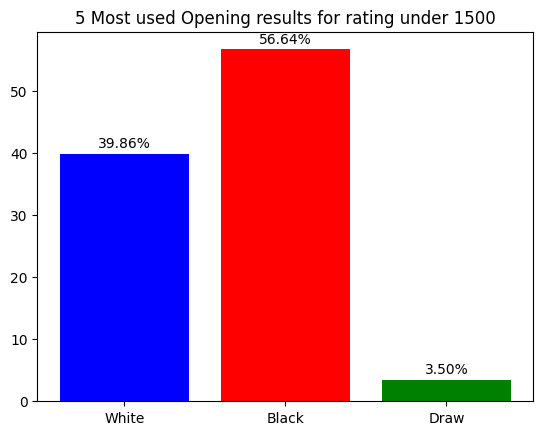

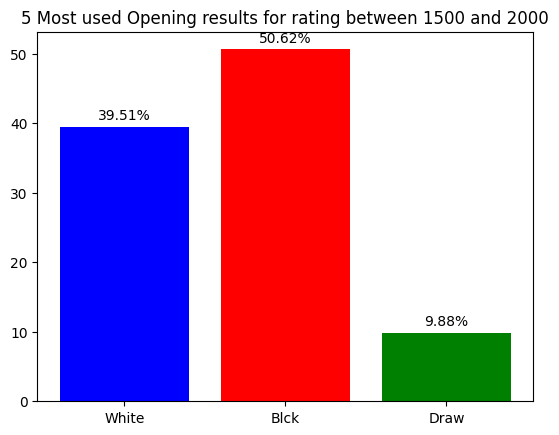

For players over 2000 on the rating scale we have only 2 games with the win of the 'White' for both of them 


,white_rating,winner
680,2091.0,white
49,2436.0,white


In [14]:
class_top_five_used = df[df["opening_name"].isin(["Sicilian Defense", "Van't Kruijs Opening", "Scandinavian Defense: Mieses-Kotroc Variation", "French Defense: Knight Variation", "Scandinavian Defense"])][["white_rating", "winner"]].sort_values("white_rating")
class_top_five_used_rating1 = class_top_five_used[class_top_five_used[ "white_rating"] < 1500]
win_counts = class_top_five_used_rating1['winner'].value_counts()
white_win_percentage = (win_counts['white'] / len(class_top_five_used_rating1)) * 100
black_win_percentage = (win_counts['black'] / len(class_top_five_used_rating1)) * 100
draw_percentage = (win_counts['draw'] / len(class_top_five_used_rating1)) * 100
labels = ['White', 'Black', 'Draw']
percentages = [white_win_percentage, black_win_percentage , draw_percentage ]
plt.bar(labels, percentages, color=['blue', 'red', 'green'])
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f"{percentage:.2f}%", ha='center')
plt.title("5 Most used Opening results for rating under 1500")
plt.show()

class_top_five_used_rating2 = class_top_five_used[(class_top_five_used[ "white_rating"] > 1500) & (class_top_five_used[ "white_rating"] < 2000)]
win_counts = class_top_five_used_rating2['winner'].value_counts()
white_win_percentage = (win_counts['white'] / len(class_top_five_used_rating2)) * 100
black_win_percentage = (win_counts['black'] / len(class_top_five_used_rating2)) * 100
draw_percentage = (win_counts['draw'] / len(class_top_five_used_rating2)) * 100
labels = ['White', 'Blck' , 'Draw']
percentages = [white_win_percentage,black_win_percentage,  draw_percentage ]
plt.bar(labels, percentages, color=['blue', 'red', 'green'])
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f"{percentage:.2f}%", ha='center')
plt.title("5 Most used Opening results for rating between 1500 and 2000")
plt.show()


class_top_five_used_rating3 = class_top_five_used[class_top_five_used[ "white_rating"] > 2000 ]
print("For players over 2000 on the rating scale we have only 2 games with the win of the 'White' for both of them ")
class_top_five_used_rating3


## For players with rating  2000 the black ones have more than 50% chance to win a game.

# --------------------------------------------------------------------------------------------

## Now we will explore best first moves (most likely to win if we start with).

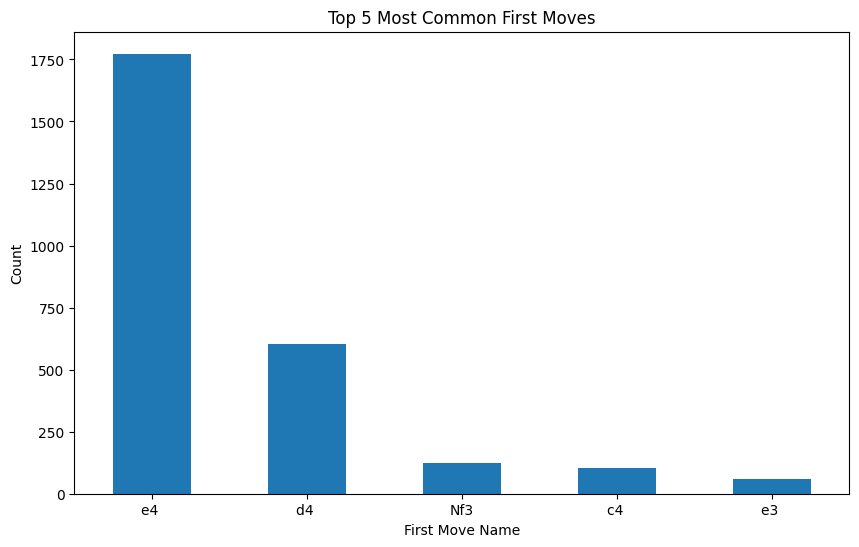

In [15]:
df_moves = df[["moves"]]
df_moves.insert(1, "first move",  df_moves["moves"].str.slice(0, 3) )
first_move_most_used = df_moves["first move"].value_counts().head(5)
plt.figure(figsize=(10, 6))
first_move_most_used.plot(kind='bar', rot=0)
plt.xlabel('First Move Name')
plt.ylabel('Count')
plt.title('Top 5 Most Common First Moves')
plt.show()

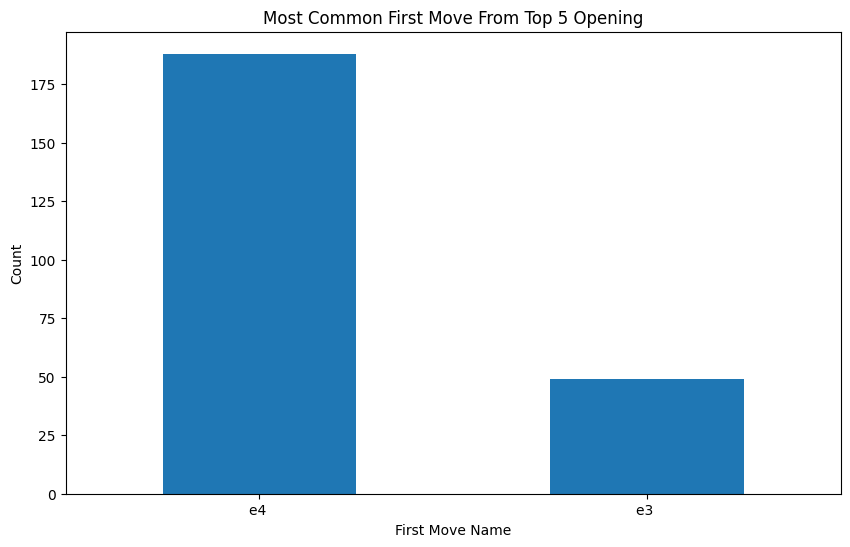

In [16]:
df_top5 = df_filtered[["moves", "opening_name"]]
df_top5.insert(2 , "first_move", df_top5["moves"].str.slice(0, 3))
top = df_top5['first_move'].value_counts()

plt.figure(figsize=(10, 6))
top.plot(kind='bar', rot=0)
plt.xlabel('First Move Name')
plt.ylabel('Count')
plt.title('Most Common First Move From Top 5 Opening')
plt.show()

## As First move the most of the games begin with e4 as a first move.

# --------------------------------------------------------------------------------------------

# Conclusion: From all the dataset the black players have mostly a chance to win a game with whatever their rating is and most of white players start their games with 'e4' move.